In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'



#### 读取数据

In [2]:
train_data = pd.read_csv('KDDTrain+.txt', sep=',',header= None)

train_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

train_data = train_data.dropna()
train_data.head()


d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,26,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [3]:
test_data = pd.read_csv('KDDTest+.txt', sep=',',header= None)
test_data.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

test_data = test_data.dropna()
test_data.head()

d:\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15.0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11.0


#### 将字符串数字转化成文本

In [4]:
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())

text_columns = test_data.select_dtypes(include=['object'])
print(text_columns.head())

  protocol_type   service flag srv_serror_rate rerror_rate  \
0           tcp  ftp_data   SF            0.00        0.00   
1           udp     other   SF            0.00        0.00   
2           tcp   private   S0            1.00        0.00   
3           tcp      http   SF            0.20        0.00   
4           tcp      http   SF            0.00        0.00   

  dst_host_srv_rerror_rate  outcome  
0                     0.00   normal  
1                     0.00   normal  
2                     0.00  neptune  
3                     0.01   normal  
4                     0.00   normal  
  protocol_type   service  flag dst_host_srv_rerror_rate  outcome
0           tcp   private   REJ                     1.00  neptune
1           tcp   private   REJ                     1.00  neptune
2           tcp  ftp_data    SF                     0.00   normal
3          icmp     eco_i    SF                     0.00    saint
4           tcp    telnet  RSTO                     0.71    mscan


In [5]:
train_data["dst_host_srv_rerror_rate"] = train_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["srv_serror_rate"] = train_data["srv_serror_rate"].apply(pd.to_numeric, errors='coerce')
train_data["rerror_rate"] = train_data["rerror_rate"].apply(pd.to_numeric, errors='coerce')
train_data = train_data.reset_index()
text_columns = train_data.select_dtypes(include=['object'])
print(text_columns.head())


test_data["dst_host_srv_rerror_rate"] = test_data["dst_host_srv_rerror_rate"].apply(pd.to_numeric, errors='coerce')
text_columns = test_data.select_dtypes(include=['object'])
test_data = test_data.reset_index()
print(text_columns.head())

#print(train_data.isna().sum().sum())

  protocol_type   service flag  outcome
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  neptune
3           tcp      http   SF   normal
4           tcp      http   SF   normal
  protocol_type   service  flag  outcome
0           tcp   private   REJ  neptune
1           tcp   private   REJ  neptune
2           tcp  ftp_data    SF   normal
3          icmp     eco_i    SF    saint
4           tcp    telnet  RSTO    mscan


#### 至此，获得干净的元数据，train_data,test_data,开始可视化

In [6]:
def generate_gradient_colors(start_color, end_color, num_colors):
    """
    生成渐变颜色列表

    参数:
    start_color (tuple): 开始颜色，包含(r, g, b)的元组，每个分量取值范围为0到255。
    end_color (tuple): 结束颜色，包含(r, g, b)的元组，每个分量取值范围为0到255。
    num_colors (int): 要生成的渐变颜色数量。

    返回:
    list: 包含渐变颜色的列表，每个颜色表示为(r, g, b)的元组。
    """
    gradient_colors = []

    # 计算颜色渐变步长
    r_step = (end_color[0] - start_color[0]) / (num_colors - 1)
    g_step = (end_color[1] - start_color[1]) / (num_colors - 1)
    b_step = (end_color[2] - start_color[2]) / (num_colors - 1)

    # 生成渐变颜色
    for i in range(num_colors):
        r = start_color[0] + i * r_step
        g = start_color[1] + i * g_step
        b = start_color[2] + i * b_step
        gradient_colors.append((r/255, g/255, b/255))

    return gradient_colors
print(generate_gradient_colors((44,65,80), (181,211,217), 4))

[(0.17254901960784313, 0.2549019607843137, 0.3137254901960784), (0.35163398692810455, 0.4457516339869281, 0.49281045751633984), (0.5307189542483659, 0.6366013071895424, 0.6718954248366013), (0.7098039215686275, 0.8274509803921568, 0.8509803921568627)]


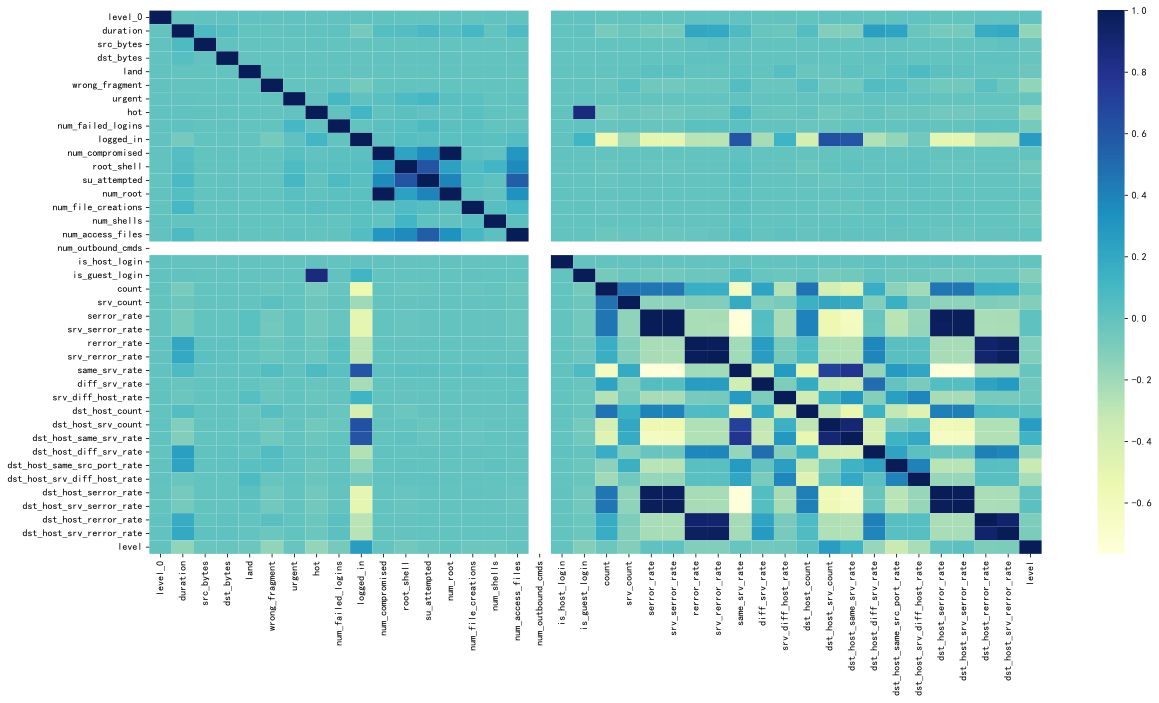

,level_0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,0,491,0,0,0,0,0,0,0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20.0
1,1,0,146,0,0,0,0,0,0,0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15.0
2,2,0,0,0,0,0,0,0,0,0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19.0
3,3,0,232,8153,0,0,0,0,0,1,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21.0
4,4,0,199,420,0,0,0,0,0,1,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.0


In [7]:
numeric_columns = train_data.select_dtypes(include=['number']).reset_index()
numeric_columns.head()
del numeric_columns["index"]
correlation_matrix = numeric_columns.corr()
#custom_cmap = mcolors.ListedColormap([(44/255,65/255,80/255),(111/255,160/255,172/255),(181/255,211/255,217/255),(252/255,238/255,226/255),(93/255,136/255,123/255)])
#sns.heatmap(correlation_matrix, annot=False, cmap=custom_cmap)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")
# 添加标题

#sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
#plt.title('数字特征热力图')
# 显示热力图
plt.show()
numeric_columns.head()

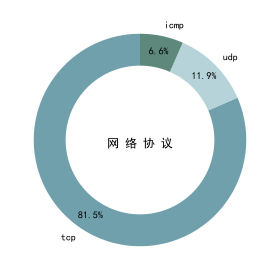

In [8]:
protocol_type = train_data["protocol_type"].value_counts().to_dict()

# 饼图标签
labels = protocol_type.keys()

# 饼图数据
sizes = protocol_type.values()

# 颜色
colors = [(111/255,160/255,172/255), (181/255,211/255,217/255),(93/255,136/255,123/255)]

# 爆炸（可选，用于突出显示某个块）
explode = (0.0, 0, 0)

# 创建饼图
plt.figure(dpi = 300)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# 添加一个中心圆，使饼图看起来更像一个环形图
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 饼图标题
plt.title('网 络 协 议',loc = 'center',y=0.45)

# 显示饼图
#plt.axis('equal')  # 保证饼图是圆形而不是椭圆
plt.tight_layout()
plt.show()


[53600, 12434, 1309]
[49084, 2559, 6982]


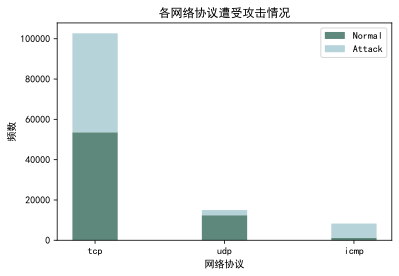

In [9]:
two_df = train_data[["protocol_type","outcome"]]
two_df.head()
normal_count = []
attack_count = []
name_list = list(train_data["protocol_type"].unique())
for i in name_list:
    normal_count.append(two_df[two_df["protocol_type"] == i]["outcome"].value_counts()["normal"])
    attack_count.append(len(two_df[two_df["protocol_type"] == i]["outcome"])-two_df[two_df["protocol_type"] == i]["outcome"].value_counts()["normal"])
print(normal_count)
print(attack_count)
categories =    name_list
bottom_data = normal_count
top_data = attack_count

# 创建柱状图
fig, ax = plt.subplots()

# 设置每个柱子的宽度
bar_width = 0.35

# 生成柱子的位置
x = np.arange(len(categories))

# 绘制底部柱子
ax.bar(x, bottom_data, bar_width, label='Normal', color=(93/255,136/255,123/255))

# 绘制顶部柱子，位置稍微向上偏移
ax.bar(x, top_data, bar_width, label='Attack', color=(181/255,211/255,217/255), bottom=bottom_data)

# 添加标签和标题
ax.set_xlabel('网络协议')
ax.set_ylabel('频数')
ax.set_title('各网络协议遭受攻击情况')

# 添加图例
ax.legend()

# 设置x轴标签
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

{'SF': 74945, 'S0': 34847, 'REJ': 11232, 'others': 4944}


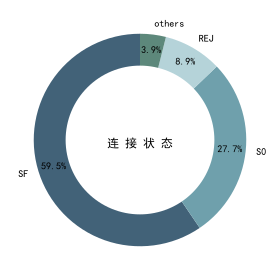

In [10]:
flag = train_data["flag"].value_counts().to_dict()
flag = dict(sorted(flag.items(), key=lambda item: item[1], reverse=True))


draw_flag = {}
others = 0
for i in range(len(flag)):
    if i <=2:
        draw_flag[list(flag.keys())[i]] = list(flag.values())[i]
    else:
        others = others + list(flag.values())[i]
draw_flag["others"] = others
print(draw_flag)
# 饼图标签
labels = draw_flag.keys()

# 饼图数据
sizes = draw_flag.values()

# 颜色
colors = [(66/255,97.5/255,120/255),(111/255,160/255,172/255), (181/255,211/255,217/255),(93/255,136/255,123/255)]

# 爆炸（可选，用于突出显示某个块）
#explode = (0.0, 0, 0)

# 创建饼图
plt.figure(dpi = 300)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90,colors = colors,pctdistance=0.85)

# 添加一个中心圆，使饼图看起来更像一个环形图
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 饼图标题
plt.title('连 接 状 态',loc = 'center',y=0.45)

# 显示饼图
#plt.axis('equal')  # 保证饼图是圆形而不是椭圆
plt.tight_layout()
plt.show()

[63393, 354, 2693, 903]
[11552, 34493, 8539, 4041]
['SF', 'S0', 'REJ', 'others']


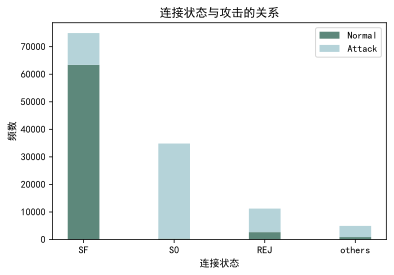

In [11]:
two_df = train_data[["flag","outcome"]]
two_df.head()
normal_count = []
attack_count = []
name_list = list(train_data["flag"].unique())
for i in name_list:
    normal_count.append(two_df[two_df["flag"] == i]["outcome"].value_counts().get("normal",0))
    attack_count.append(len(two_df[two_df["flag"] == i]["outcome"])-two_df[two_df["flag"] == i]["outcome"].value_counts().get("normal",0))

normal_count_ = []
attack_count_ = []
name_list_ = []
for i in range(len(normal_count)):
    if(i <= 3):
        normal_count_.append(normal_count[i])
        attack_count_.append(attack_count[i])
        name_list_.append(name_list[i])
    else:
        normal_count_[3] = normal_count_[3] + normal_count[i]
        attack_count_[3] = attack_count_[3] + attack_count[i]
name_list_[3]="others"    
print(normal_count_)
print(attack_count_)
print(name_list_)
categories =    name_list_
bottom_data = normal_count_
top_data = attack_count_



# 创建柱状图
fig, ax = plt.subplots()

# 设置每个柱子的宽度
bar_width = 0.35

# 生成柱子的位置
x = np.arange(len(categories))

# 绘制底部柱子
ax.bar(x, bottom_data, bar_width, label='Normal', color=(93/255,136/255,123/255))

# 绘制顶部柱子，位置稍微向上偏移
ax.bar(x, top_data, bar_width, label='Attack', color=(181/255,211/255,217/255), bottom=bottom_data)

# 添加标签和标题
ax.set_xlabel('连接状态')
ax.set_ylabel('频数')
ax.set_title('连接状态与攻击的关系')

# 添加图例
ax.legend()

# 设置x轴标签
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

[40338, 21852, 9043, 7313, 6860, 4586, 4359, 3077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


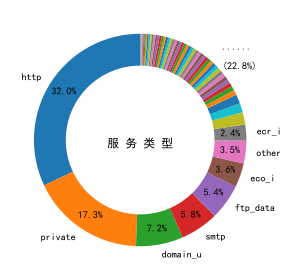

In [12]:
flag = train_data["service"].value_counts().to_dict()
flag = dict(sorted(flag.items(), key=lambda item: item[1], reverse=True))
from matplotlib import cm


others = 0
labels = []
autopct = []
for i in range(len(flag)):
    if i <=7:
        labels.append(list(flag.keys())[i])
        autopct.append(list(flag.values())[i])
    else:
        if i == 20:
            labels.append("......\n\n(22.8%)")
        else :
            labels.append(" ")
        autopct.append(0)
print(autopct)
# 饼图标签
#labels = flag.keys()

# 饼图数据
sizes = flag.values()

# 颜色
#colors = [(44/255,65/255,80/255),(111/255,160/255,172/255), (181/255,211/255,217/255),(93/255,136/255,123/255)]

# 爆炸（可选，用于突出显示某个块）
#explode = (0.0, 0, 0)
def custom_labels(pct):
    if(pct > 2):
        return f'{pct:.1f}%'
    return " "
# 创建饼图
plt.figure(dpi = 300)
plt.pie(sizes,labels=labels, autopct=custom_labels, startangle=90,pctdistance=0.85)#colors=plt.get_cmap('summer')(range(len(sizes)))

# 添加一个中心圆，使饼图看起来更像一个环形图
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 饼图标题
plt.title('服 务 类 型',loc = 'center',y=0.45)

# 显示饼图
#plt.axis('equal')  # 保证饼图是圆形而不是椭圆
plt.tight_layout()
plt.show()

[4984, 982, 38049, 9034, 7029, 7265]
[1876, 20870, 2289, 9, 284, 33297]
['ftp_data', 'private', 'http', 'domain_u', 'smtp', 'others']


[Text(0, 0, 'ftp_data'),
 Text(1, 0, 'private'),
 Text(2, 0, 'http'),
 Text(3, 0, 'domain_u'),
 Text(4, 0, 'smtp'),
 Text(5, 0, 'others')]

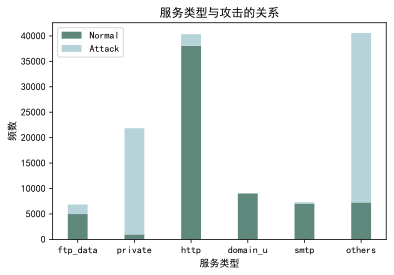

In [13]:
two_df = train_data[["service","outcome"]]
two_df.head()
normal_count = []
attack_count = []
name_list = list(train_data["service"].unique())
for i in name_list:
    normal_count.append(two_df[two_df["service"] == i]["outcome"].value_counts().get("normal",0))
    attack_count.append(len(two_df[two_df["service"] == i]["outcome"])-two_df[two_df["service"] == i]["outcome"].value_counts().get("normal",0))

normal_count_ = []
attack_count_ = []
name_list_ = []
name_vis = ["http","private","domain_u","smtp","ftp_data"]
normal_others = 0
attack_others = 0
for i in range(len(normal_count)):
    if(name_list[i] in name_vis):
        normal_count_.append(normal_count[i])
        attack_count_.append(attack_count[i])
        name_list_.append(name_list[i])
    else:
        normal_others = normal_others + normal_count[i]
        attack_others = attack_others + attack_count[i]
name_list_.append("others") 
normal_count_.append(normal_others)
attack_count_.append(attack_others)
print(normal_count_)
print(attack_count_)
print(name_list_)
categories =    name_list_
bottom_data = normal_count_
top_data = attack_count_



# 创建柱状图
fig, ax = plt.subplots()

# 设置每个柱子的宽度
bar_width = 0.35

# 生成柱子的位置
x = np.arange(len(categories))

# 绘制底部柱子
ax.bar(x, bottom_data, bar_width, label='Normal', color=(93/255,136/255,123/255))

# 绘制顶部柱子，位置稍微向上偏移
ax.bar(x, top_data, bar_width, label='Attack', color=(181/255,211/255,217/255), bottom=bottom_data)

# 添加标签和标题
ax.set_xlabel('服务类型')
ax.set_ylabel('频数')
ax.set_title('服务类型与攻击的关系')

# 添加图例
ax.legend()

# 设置x轴标签
ax.set_xticks(x)
ax.set_xticklabels(categories)

In [14]:
outcome = train_data["outcome"].value_counts().to_dict()
print(outcome)
data_dict = outcome
others_value = 0
keys_to_remove = []
draw_pi_count = 0
for key, value in data_dict.items():
    if (key != "normal"):
        draw_pi_count = draw_pi_count + value
    if value < 100:
        others_value += value
        keys_to_remove.append(key)
for key in keys_to_remove:
    del data_dict[key]
data_dict['others'] = others_value
print(data_dict)
outcome_draw_bar = data_dict


{'normal': 67343, 'neptune': 41209, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2}
{'normal': 67343, 'neptune': 41209, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'others': 175}


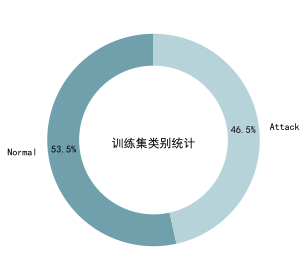

In [15]:
'''
categories = ['Normal', 'Attack']
sizes = [outcome["normal"], draw_pi_count]
plt.figure(dpi = 300)
plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=[(111/255,160/255,172/255), (181/255,211/255,217/255)])
plt.title('训练集类别统计')
plt.show()
'''


# 饼图标签
categories = ['Normal', 'Attack']
labels = categories

# 饼图数据
sizes = [outcome["normal"], draw_pi_count]

# 颜色
colors = [(111/255,160/255,172/255), (181/255,211/255,217/255)]

# 爆炸（可选，用于突出显示某个块）
explode = (0.0, 0)

# 创建饼图
plt.figure(dpi = 300)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# 添加一个中心圆，使饼图看起来更像一个环形图
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 饼图标题
plt.title('训练集类别统计',loc = 'center',y=0.45)

# 显示饼图
#plt.axis('equal')  # 保证饼图是圆形而不是椭圆
plt.tight_layout()
plt.show()



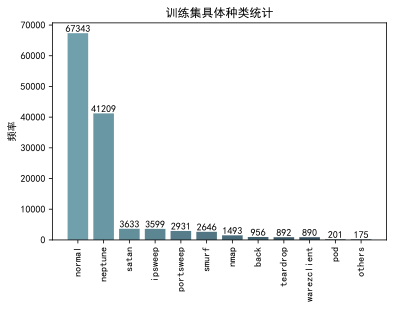

In [16]:
data_dict = outcome_draw_bar
labels = list(data_dict.keys())
values = list(data_dict.values())
colors = generate_gradient_colors((111,160,172),(44,65,80) , len(outcome_draw_bar))
plt.figure(dpi=300)
plt.bar(labels, values, color = colors)
for i in range(len(labels)):
    plt.text(labels[i], values[i], str(values[i]), ha='center', va='bottom')
plt.title('训练集具体种类统计')
plt.ylabel('频率')
plt.xticks(rotation=90)
plt.show()



{'normal': 9710, 'neptune': 4656, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'nmap': 73, 'pod': 41, 'buffer_overflow': 20, 'multihop': 18, 'named': 17, 'ps': 15, 'sendmail': 14, 'rootkit': 13, 'xterm': 13, 'teardrop': 12, 'xlock': 9, 'land': 7, 'xsnoop': 4, 'ftp_write': 3, 'worm': 2, 'loadmodule': 2, 'perl': 2, 'sqlattack': 2, 'udpstorm': 2, 'phf': 2, 'imap': 1}
{'normal': 9710, 'neptune': 4656, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'others': 272}


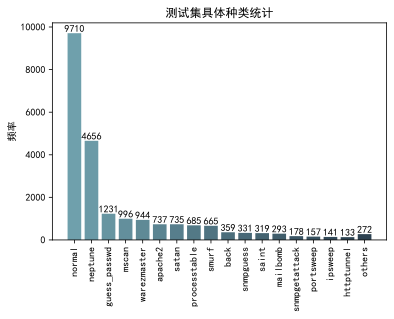

In [17]:
outcome = test_data["outcome"].value_counts().to_dict()
print(outcome)
data_dict = outcome
others_value = 0
keys_to_remove = []
draw_pi_count = 0
for key, value in data_dict.items():
    if (key != "normal"):
        draw_pi_count = draw_pi_count + value
    if value < 100:
        others_value += value
        keys_to_remove.append(key)
for key in keys_to_remove:
    del data_dict[key]
data_dict['others'] = others_value
print(data_dict)
outcome_draw_bar = data_dict

labels = list(data_dict.keys())
values = list(data_dict.values())
colors = generate_gradient_colors((111,160,172),(44,65,80) , len(outcome_draw_bar))
plt.figure(dpi=300)
plt.bar(labels, values, color = colors)
for i in range(len(labels)):
    plt.text(labels[i], values[i], str(values[i]), ha='center', va='bottom')
plt.title('测试集具体种类统计')
plt.ylabel('频率')
plt.xticks(rotation=90)
plt.show()


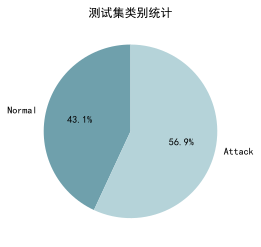

In [18]:
categories = ['Normal', 'Attack']
sizes = [outcome["normal"], draw_pi_count]
plt.figure(dpi = 300)
plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=[(111/255,160/255,172/255), (181/255,211/255,217/255)])
plt.title('测试集类别统计')
plt.show()



In [19]:
columns_set1 = set(train_data['outcome'])
columns_set2 = set(test_data['outcome'])

# 找到 df1 中不在 df2 中的列
columns_diff1 = columns_set1 - columns_set2

# 找到 df2 中不在 df1 中的列
columns_diff2 = columns_set2 - columns_set1

# 打印结果
print("Columns in df1 but not in df2:", columns_diff1)
print("Columns in df2 but not in df1:", columns_diff2)

Columns in df1 but not in df2: {'spy', 'warezclient'}
Columns in df2 but not in df1: {'named', 'udpstorm', 'xterm', 'xsnoop', 'worm', 'xlock', 'snmpgetattack', 'mailbomb', 'httptunnel', 'sendmail', 'saint', 'sqlattack', 'snmpguess', 'ps', 'apache2', 'processtable', 'mscan'}


{'named': 17, 'udpstorm': 2, 'xterm': 13, 'xsnoop': 4, 'worm': 2, 'xlock': 9, 'snmpgetattack': 178, 'mailbomb': 293, 'httptunnel': 133, 'sendmail': 14, 'saint': 319, 'sqlattack': 2, 'snmpguess': 331, 'ps': 15, 'apache2': 737, 'processtable': 685, 'mscan': 996}


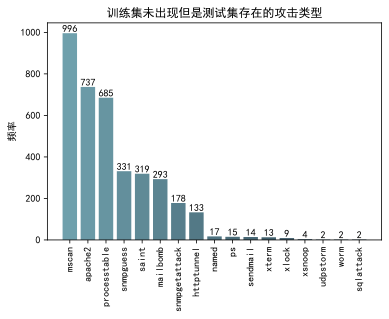

In [20]:
test_dict = test_data['outcome'].value_counts().to_dict()
only_in_test = {}
for i in list(columns_diff2):
    only_in_test[i] = test_dict[i]
print(only_in_test)

data_dict = dict(sorted(only_in_test.items(), key=lambda item: item[1], reverse=True))  # 按值升序排序
labels = list(data_dict.keys())
values = list(data_dict.values())
colors = generate_gradient_colors((111,160,172),(44,65,80) , len(outcome_draw_bar))
plt.figure(dpi=300)
plt.bar(labels, values, color = colors)
for i in range(len(labels)):
    plt.text(labels[i], values[i], str(values[i]), ha='center', va='bottom')
plt.title('训练集未出现但是测试集存在的攻击类型')
plt.ylabel('频率')
plt.xticks(rotation=90)
plt.show()

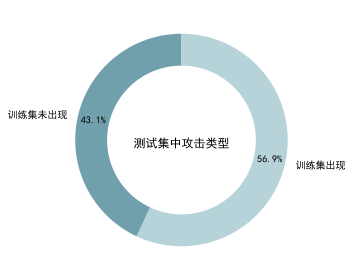

In [21]:
categories = ['训练集未出现', '训练集出现']
'''
sizes = [sum(data_dict.values()), sum(test_dict.values())]
plt.figure(dpi = 300)
plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=[(111/255,160/255,172/255), (181/255,211/255,217/255)])
plt.title('测试集中攻击类型统计')
plt.show()
'''
labels = categories

# 饼图数据
sizes = [outcome["normal"], draw_pi_count]

# 颜色
colors = [(111/255,160/255,172/255), (181/255,211/255,217/255)]

# 爆炸（可选，用于突出显示某个块）
explode = (0.0, 0)

# 创建饼图
plt.figure(dpi = 300)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# 添加一个中心圆，使饼图看起来更像一个环形图
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 饼图标题
plt.title('测试集中攻击类型',loc = 'center',y=0.45)

# 显示饼图
#plt.axis('equal')  # 保证饼图是圆形而不是椭圆
plt.tight_layout()
plt.show()




#### 数据预处理

* 文字转化成0-1向量

In [22]:
#train_data =pd.concat([train_data, pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])], axis=1)

train_data_text = pd.get_dummies(train_data[['protocol_type', 'service', 'flag']])
#del train_data_text['protocol_type']
#del train_data_text['service']
#del train_data_text['flag']
train_data_text.head()


#test_data =pd.concat([test_data, pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])], axis=1)

test_data_text = pd.get_dummies(test_data[['protocol_type', 'service', 'flag']])
#del test_data_text['protocol_type']
#del test_data_text['service']
#del test_data_text['flag']

df_zeros = pd.DataFrame(0, index=range(len(test_data_text)), columns=['service_aol', 'service_urh_i', 'service_http_2784', 'service_http_8001', 'service_harvest', 'service_red_i'])

#df_zeros.head()
test_data_text = pd.concat([test_data_text, df_zeros],axis = 1).reindex(columns=train_data_text.columns).reset_index()
del test_data_text["index"]
test_data_text.head()


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
import pandas as pd

# 创建两个示例 DataFrame，df1 和 df2，列的顺序不一样
data1 = {'A': [1, 2, 3],
         'B': [4, 5, 6]}
df1 = pd.DataFrame(data1)

data2 = {'B': [7, 8, 9],
         'A': [10, 11, 12]}
df2 = pd.DataFrame(data2)

# 使用 df1 的列顺序重新排列 df2 的列
df2 = df2.reindex(columns=df1.columns)

# 打印重新排列后的 df2
print(df2)


    A  B
0  10  7
1  11  8
2  12  9


In [24]:
columns_set1 = set(train_data_text.columns)
columns_set2 = set(test_data_text.columns)

# 找到 df1 中不在 df2 中的列
columns_diff1 = columns_set1 - columns_set2

# 找到 df2 中不在 df1 中的列
columns_diff2 = columns_set2 - columns_set1

# 打印结果
print("Columns in df1 but not in df2:", columns_diff1)
print("Columns in df2 but not in df1:", columns_diff2)

Columns in df1 but not in df2: set()
Columns in df2 but not in df1: set()


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


columns_used = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
            'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
            'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']
# 初始化标准化器和归一化器
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 对列进行标准化
scaled_columns = scaler.fit_transform(train_data[columns_used])
train_data_standardized = pd.DataFrame(scaled_columns, columns=[columns_used])
test_data_standardized = pd.DataFrame(scaler.transform(test_data[columns_used]), columns=[columns_used])



normalized_columns = minmax_scaler.fit_transform(train_data_standardized[columns_used])
train_data_normalized = pd.DataFrame(normalized_columns, columns=[columns_used])
test_data_normalized = pd.DataFrame(minmax_scaler.transform(test_data_standardized[columns_used]), columns=[columns_used])




d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
def process_column_value(value):
    if value == 'normal':
        return 0
    else:
        return 1


print(train_data_normalized.shape,train_data_normalized.isna().sum().sum())
print(train_data_text.shape,train_data_text.isna().sum().sum())
x_train = pd.concat([train_data_text.reset_index(),train_data_normalized.reset_index()],axis = 1).reset_index()
print(x_train.isna().sum().sum())

y_train = train_data['outcome']
y_train_2 = y_train.apply(process_column_value)

x_test = pd.concat([test_data_text.reset_index(),test_data_normalized.reset_index()],axis = 1).reset_index()
y_test = test_data['outcome']
y_test_2 = y_test.apply(process_column_value)


(125968, 39) 0
(125968, 84) 0
0


In [27]:
print(y_test_2)

0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64


#### 降维

In [36]:
from sklearn.decomposition import PCA



# 初始化 PCA 模型，并指定降维后的维度
n_components = 42  # 降维后的维度
pca = PCA(n_components=n_components)

# 将高维特征数据进行降维
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


# 创建降维后的 DataFrame
x_train_pca = pd.DataFrame(data=x_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
x_test_pca = pd.DataFrame(data=x_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# 打印降维后的 DataFrame
print(x_train_pca)
#pca.explained_variance_ratio_


d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


                  PC1       PC2       PC3       PC4       PC5       PC6  \
0      -109090.622038 -0.369511  0.207933  0.329368  0.455597 -0.692606   
1      -109088.889988 -0.084385  0.629834  1.403534 -0.027859 -0.640501   
2      -109087.157937  2.041657 -0.431167 -0.031910 -0.060154  0.054264   
3      -109085.425886 -1.221427 -0.610831 -0.609190  0.021608  0.232700   
4      -109083.693835 -1.221124 -0.491926 -0.521479 -0.404451 -0.032930   
...               ...       ...       ...       ...       ...       ...   
125963  109083.693835  2.049296 -0.434562 -0.011824 -0.071228  0.058852   
125964  109085.425886 -0.701898  0.129527  1.121497 -0.767457  0.016099   
125965  109087.157937 -0.315142 -0.179957 -0.054817  0.255280 -1.175492   
125966  109088.889988  1.975999 -0.510930 -0.038583  0.015122  0.057623   
125967  109090.622039 -0.634715 -0.072691  0.022685  0.295546 -1.020953   

             PC7       PC8       PC9      PC10  ...      PC33      PC34  \
0      -0.176427 -0.0813

d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
y_train_2

0         0
1         0
2         1
3         0
4         0
         ..
125963    1
125964    0
125965    0
125966    1
125967    0
Name: outcome, Length: 125968, dtype: int64

#### 二分类

##### 贝叶斯

In [30]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = MultinomialNB()

# 训练分类器
nb_classifier.fit(x_train, y_train_2)

# 使用分类器进行预测
y_pred = nb_classifier.predict(x_test)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_2, y_pred))



d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
d:\anaconda\envs\ML\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9710
           1       0.96      0.63      0.76     12832

    accuracy                           0.78     22542
   macro avg       0.81      0.80      0.77     22542
weighted avg       0.83      0.78      0.77     22542



In [37]:
from sklearn.tree import DecisionTreeClassifier


# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=69,criterion = 'gini')

# 训练模型
clf.fit(x_train_pca, y_train_2)

# 预测测试集
y_pred = clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_2, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_2, y_pred))

Accuracy: 0.8474846952355602
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      9710
           1       0.94      0.78      0.85     12832

    accuracy                           0.85     22542
   macro avg       0.85      0.86      0.85     22542
weighted avg       0.86      0.85      0.85     22542



##### 随机森林

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 划分数据集为训练集和测试集
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林分类器并设置树的数量为 50
rf_classifier = RandomForestClassifier(n_estimators=42, random_state=42)

# 训练分类器
rf_classifier.fit(x_train_pca, y_train_2)

# 使用分类器进行预测
y_pred = rf_classifier.predict(x_test_pca)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_2, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9710
           1       0.97      0.68      0.80     12832

    accuracy                           0.80     22542
   macro avg       0.83      0.82      0.80     22542
weighted avg       0.85      0.80      0.80     22542



In [59]:
from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载示例数据集（鸢尾花数据集）
#data = load_iris()
#X = data.data
#y = data.target

# 划分数据集为训练集和测试集
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建MLP分类器
clf = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=42) #100

# 训练模型
clf.fit(x_train_pca, y_train_2)

# 预测测试集
y_pred = clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_2, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.43079584775086505


In [72]:
# 定义训练数据集和测试数据集
X_train_ = torch.from_numpy(x_train_pca.values).float()
y_train_ = torch.from_numpy(y_train_2.values).long()

X_test_ = torch.from_numpy(x_test_pca.values).float()
y_test_ = torch.from_numpy(y_test_2.values).long()

# 创建数据加载器
train_dataset = TensorDataset(X_train_, y_train_)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_, y_test_)
test_loader = DataLoader(test_dataset, batch_size=32)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 创建MLP模型
input_size = 42  # 输入特征的维度
hidden_size = 82  # 隐藏层的神经元数量
output_size = 2  # 输出类别数量
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数，用于分类任务
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

loss_history = []
# 训练循环
num_epochs = 2
best_accuracy = 0
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(labels.dtype)
        loss = criterion(outputs, labels)
        loss_history.append(loss)
        loss.backward()
        optimizer.step()

    # 在每个epoch结束后进行测试
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).float()
            #print(accuracy_score(outputs.data.numpy(),labels.numpy()))
            _, predicted = torch.max(outputs.data, 1)
            print(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    if accuracy >= best_accuracy:
        torch.save(model,"best_MLP_2.pt")
        best_accuracy = accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.5f}, Accuracy: {100 * accuracy:.2f}, Best Accuracy:{100 * best_accuracy:.2f}%')

# 训练完成后，你可以使用模型进行预测

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1,

In [26]:
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 初始化多分类 SVM 模型（默认使用 OvR 策略）
svm_classifier = SVC(kernel='rbf')

# 训练模型
svm_classifier.fit(x_train_pca, y_train_2)

# 预测测试数据
y_pred = svm_classifier.predict(x_test_pca)

# 计算准确率
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy:.2f}')
'''

"\nfrom sklearn import datasets\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\n\n\n# 初始化多分类 SVM 模型（默认使用 OvR 策略）\nsvm_classifier = SVC(kernel='rbf')\n\n# 训练模型\nsvm_classifier.fit(x_train_pca, y_train_2)\n\n# 预测测试数据\ny_pred = svm_classifier.predict(x_test_pca)\n\n# 计算准确率\naccuracy = accuracy_score(y_test_2, y_pred)\nprint(f'Accuracy: {accuracy:.2f}')\n"

In [27]:
print(y_test_2)

0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64


#### 多分类

##### label

In [38]:
y_label = pd.concat([y_test,y_train],axis = 0).reset_index()
name_list = list(y_label['outcome'].unique())
name_dict = {}
for i in range(len(name_list)):
    name_dict[name_list[i]] = i
print(name_dict)
y_train_mul = y_train_2.reindex()
y_test_mul = y_test_2.reindex()

for i in range(len(y_train)):
    y_train_mul[i] = name_dict[y_train[i]]
#print(y_train_mul)
print(y_test_2)
for i in range(len(y_test)):
    y_test_mul[i] = name_dict[y_test[i]]

{'neptune': 0, 'normal': 1, 'saint': 2, 'mscan': 3, 'guess_passwd': 4, 'smurf': 5, 'apache2': 6, 'satan': 7, 'buffer_overflow': 8, 'back': 9, 'warezmaster': 10, 'snmpgetattack': 11, 'processtable': 12, 'pod': 13, 'httptunnel': 14, 'nmap': 15, 'ps': 16, 'snmpguess': 17, 'ipsweep': 18, 'mailbomb': 19, 'portsweep': 20, 'multihop': 21, 'named': 22, 'sendmail': 23, 'loadmodule': 24, 'xterm': 25, 'worm': 26, 'teardrop': 27, 'rootkit': 28, 'xlock': 29, 'perl': 30, 'land': 31, 'xsnoop': 32, 'sqlattack': 33, 'ftp_write': 34, 'imap': 35, 'udpstorm': 36, 'phf': 37, 'warezclient': 38, 'spy': 39}
0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64


In [39]:
from sklearn.tree import DecisionTreeClassifier


# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=69)

# 训练模型
clf.fit(x_train_pca, y_train_mul)

# 预测测试集
y_pred = clf.predict(x_test_pca)

# 计算准确度
accuracy = accuracy_score(y_test_mul, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_mul, y_pred))

Accuracy: 0.6937716262975778
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4656
           1       0.74      0.93      0.82      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.00      0.00      0.00      1231
           5       0.81      1.00      0.90       665
           6       0.00      0.00      0.00       737
           7       0.35      0.78      0.49       735
           8       0.00      0.00      0.00        20
           9       0.42      0.97      0.59       359
          10       0.90      0.03      0.05       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.68      0.73      0.71        41
          14       0.00      0.00      0.00       133
          15       0.41      0.99      0.58        73
          16       0.00      0.00      0.00        1

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

In [ ]:
print(y_test_2)

0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64


##### 随机森林

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# 训练分类器
rf_classifier.fit(x_train_pca, y_train_mul)

# 使用分类器进行预测
y_pred = rf_classifier.predict(x_test_pca)

# 计算分类器的准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print(classification_report(y_test_mul, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4656
           1       0.67      0.97      0.79      9710
           2       0.00      0.00      0.00       319
           3       0.00      0.00      0.00       996
           4       0.00      0.00      0.00      1231
           5       0.99      1.00      1.00       665
           6       0.00      0.00      0.00       737
           7       0.51      0.84      0.63       735
           8       0.00      0.00      0.00        20
           9       0.52      0.99      0.68       359
          10       0.88      0.01      0.01       944
          11       0.00      0.00      0.00       178
          12       0.00      0.00      0.00       685
          13       0.76      0.93      0.84        41
          14       0.00      0.00      0.00       133
          15       0.23      1.00      0.38        73
          16       0.00      0.00      0.00        15
          17

d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1308:

In [ ]:
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 初始化多分类 SVM 模型（默认使用 OvR 策略）
svm_classifier = SVC(kernel='rbf')

# 训练模型
svm_classifier.fit(x_train_pca, y_train_mul)

# 预测测试数据
y_pred = svm_classifier.predict(x_test_pca)

# 计算准确率
accuracy = accuracy_score(y_test_mul, y_pred)
print(f'Accuracy: {accuracy:.2f}')
'''

Accuracy: 0.43


In [ ]:
y_train_mul.unique()

array([ 1,  0, 38, 18, 20, 27, 15,  7,  5, 13,  9,  4, 34, 21, 28,  8, 35,
       10, 37, 31, 24, 39, 30], dtype=int64)

In [ ]:

# 定义训练数据集和测试数据集
print(x_train.shape)

X_train = torch.from_numpy(x_train_pca.values).float()
y_train = torch.from_numpy(y_train_mul.values).long()

X_test = torch.from_numpy(x_test_pca.values).float()
y_test = torch.from_numpy(y_test_mul.values).long()

# 创建数据加载器
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 创建MLP模型
input_size = 42  # 输入特征的维度
hidden_size = 160  # 隐藏层的神经元数量
output_size = 2  # 输出类别数量
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数，用于分类任务
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

# 训练循环
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(labels.dtype)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 在每个epoch结束后进行测试
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).float()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.5f}, Accuracy: {100 * accuracy:.2f}%')

# 训练完成后，你可以使用模型进行预测


(125968, 126)
Epoch [1/5], Loss: 49.22644, Accuracy: 56.92%
Epoch [2/5], Loss: 8.86034, Accuracy: 56.92%
Epoch [3/5], Loss: 7.26790, Accuracy: 75.30%
Epoch [4/5], Loss: 0.97511, Accuracy: 65.46%
Epoch [5/5], Loss: 4.02087, Accuracy: 89.19%


In [ ]:
y_test_2

0        1
1        1
2        0
3        1
4        1
        ..
22537    0
22538    0
22539    1
22540    0
22541    1
Name: outcome, Length: 22542, dtype: int64